In [52]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [37]:
dallas = pd.read_csv('../dataset/processed/dallas_cleaned.csv')
dallas.drop(columns=['Unnamed: 0'], inplace=True)
dallas.sample(5)

,Severity,Start_Time,End_Time,Duration,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Street_Name,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
27143,2,2021-01-25 05:37:27,2021-01-25 07:35:21,01:57:54,32.796818,-96.761451,32.797158,-96.761061,0.033,Columbia Ave,...,False,False,False,False,True,False,Night,Night,Night,Night
20613,2,2021-11-14 11:13:41,2021-11-14 12:28:41,01:15:00,32.834757,-96.670404,32.834750,-96.667047,0.195,Gus Thomasson Rd,...,False,False,False,False,False,False,Day,Day,Day,Day
33173,2,2020-12-29 02:45:42,2020-12-29 04:23:50,01:38:08,32.702309,-96.657098,32.701233,-96.653271,0.235,S Saint Augustine Dr,...,False,False,False,False,False,False,Night,Night,Night,Night
808,2,2016-10-21 15:05:50,2016-10-21 21:05:50,06:00:00,32.872390,-96.679660,32.873550,-96.681500,0.134,I-635 W,...,False,False,False,False,False,False,Day,Day,Day,Day
33433,2,2020-11-17 07:53:01,2020-11-17 09:08:01,01:15:00,32.780638,-96.803058,32.781338,-96.803258,0.050,N Griffin St,...,False,False,False,False,True,False,Day,Day,Day,Day


In [38]:
dallas[['Start_Lat', 'Start_Lng']]

,Start_Lat,Start_Lng
0,32.84365,-96.774630
1,32.84662,-96.637360
2,32.79385,-96.702780
3,32.85710,-96.770460
4,32.87684,-96.810010
...,...,...
41610,32.86174,-96.657570
41611,32.67827,-96.822740
41612,32.92601,-96.820616
41613,32.90422,-96.769110


In [39]:
dallas_gdf = gpd.GeoDataFrame(dallas, geometry=gpd.points_from_xy(dallas['Start_Lng'], dallas['Start_Lat']))
dallas_gdf.head(5)

,Severity,Start_Time,End_Time,Duration,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Street_Name,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,geometry
0,2,2016-11-30 15:29:48,2016-11-30 21:29:48,06:00:00,32.84365,-96.77463,32.81833,-96.78806,1.915,US-75 S,...,False,False,False,False,False,Day,Day,Day,Day,POINT (-96.77463 32.84365)
1,2,2016-11-30 15:41:16,2016-11-30 21:41:16,06:00:00,32.84662,-96.63736,32.84640,-96.63711,0.021,I-635 S,...,False,False,False,False,False,Day,Day,Day,Day,POINT (-96.63736 32.84662)
2,3,2016-11-30 16:16:05,2016-11-30 22:16:05,06:00:00,32.79385,-96.70278,32.79498,-96.69424,0.502,R L Thornton Fwy E,...,False,False,False,False,False,Day,Day,Day,Day,POINT (-96.70278 32.79385)
3,3,2016-11-30 16:16:05,2016-11-30 22:16:05,06:00:00,32.85710,-96.77046,32.84623,-96.77330,0.769,Southwestern Blvd,...,False,False,False,True,False,Day,Day,Day,Day,POINT (-96.77046 32.85710)
4,3,2016-11-30 16:21:05,2016-11-30 22:21:05,06:00:00,32.87684,-96.81001,32.88004,-96.80963,0.222,Dallas North Tollway N,...,False,False,False,False,False,Day,Day,Day,Day,POINT (-96.81001 32.87684)


In [40]:
type(dallas_gdf)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

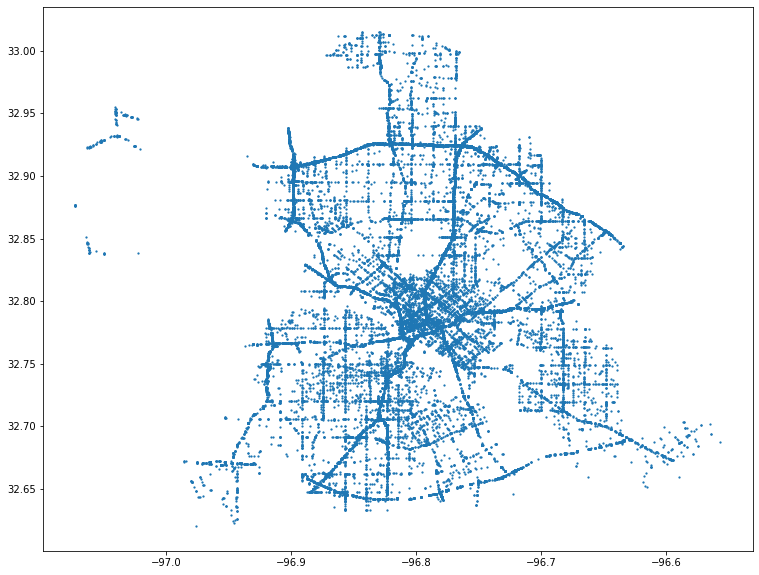

In [41]:
dallas_gdf.plot(markersize=1.5, figsize = (20,10))

In [42]:
ESRI_WKT = 'GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["Degree",0.017453292519943295]]'

dallas_gdf.to_file(filename='../reports/dallas_accidents_points.shp', driver='ESRI Shapefile', crs=ESRI_WKT)

/Users/rosalierazonable/opt/miniconda3/envs/trafficAccident-env/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/var/folders/r0/bg7nbzgj7fj1d05b77qtq9jr0000gp/T/ipykernel_12130/3849078515.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  dallas_gdf.to_file(filename='../reports/dallas_accidents_points.shp', driver='ESRI Shapefile', crs=ESRI_WKT)


In [43]:
# url = 'https://gis.dallascityhall.com/wwwgis/rest/services/Basemap/CouncilBoundaries/MapServer?f=pjson'


dallas_streets = gpd.read_file('../shapefiles/dallas_streets.shp')

In [49]:
dallas_streets.sample(5)

,PREFIX,NAME,TYPE,SUFFIX,L_F_ADD,L_T_ADD,R_F_ADD,R_T_ADD,CITY_L,CITY_R,...,COUNTY00_L,TF_DIR,FT_DIR,HWY_NUM,SHIELD,FULLSTREET,L_ROW,R_ROW,SHAPE_len,geometry
38406,None,LAKAWANA,ST,None,5001,5099,5000,5098,DALLAS,DALLAS,...,113,None,None,None,None,LAKAWANA ST,DALLAS,DALLAS,517.619086,"LINESTRING (2471366.900 6980804.476, 2471368.7..."
95188,None,RANCH,TRL,None,0,0,1901,1919,IRVING,DALLAS,...,113,None,W,None,None,RANCH TRL,IRVING,IRVING,98.852163,"LINESTRING (2438467.710 7023036.015, 2438368.8..."
47380,None,DEVERON,DR,None,5502,5534,5501,5529,DALLAS,DALLAS,...,113,None,None,None,None,DEVERON DR,DALLAS,DALLAS,128.155290,"LINESTRING (2484979.983 6934203.922, 2484977.1..."
78083,None,HAAS,DR,None,4812,4858,4811,4857,DALLAS,DALLAS,...,113,None,None,None,None,HAAS DR,DALLAS,DALLAS,736.462528,"LINESTRING (2501849.159 6942463.199, 2501827.7..."
10139,None,LAKELAND,DR,None,2601,2609,0,0,DALLAS,DALLAS,...,113,W,None,None,None,LAKELAND DR,DALLAS,DALLAS,159.571248,"LINESTRING (2522249.269 6981943.430, 2522363.0..."


In [45]:
dallas_streets.columns

Index(['PREFIX', 'NAME', 'TYPE', 'SUFFIX', 'L_F_ADD', 'L_T_ADD', 'R_F_ADD',
       'R_T_ADD', 'CITY_L', 'CITY_R', 'F_ZLEV', 'T_ZLEV', 'CLASS', 'SPEED',
       'ONE_WAY', 'FT_COST', 'TF_COST', 'SCHL_ZONE', 'FCC', 'SEGMENT_ID',
       'POSTAL_L', 'POSTAL_R', 'PLACE00_L', 'PLACE00_R', 'COUNTY00_R',
       'COUNTY00_L', 'TF_DIR', 'FT_DIR', 'HWY_NUM', 'SHIELD', 'FULLSTREET',
       'L_ROW', 'R_ROW', 'SHAPE_len', 'geometry'],
      dtype='object')

<AxesSubplot:>

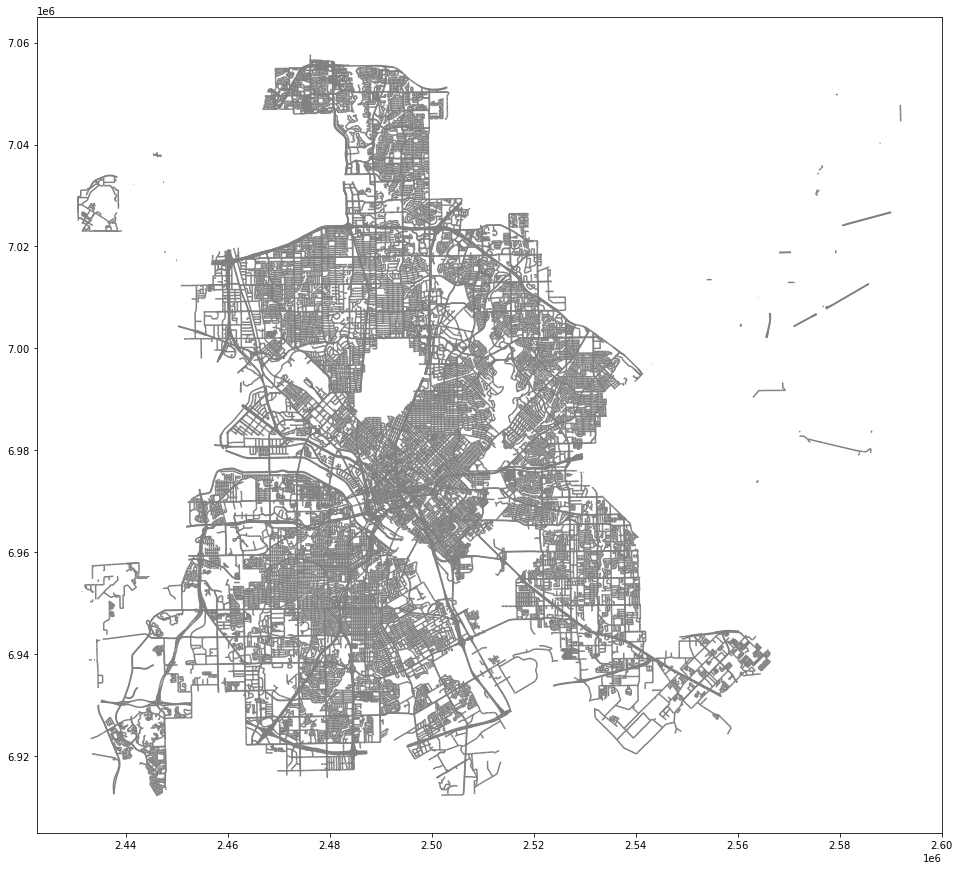

In [67]:
dallas_streets.plot(color='grey', figsize=(20,15))

In [69]:
type(dallas_streets.geometry[0])

shapely.geometry.linestring.LineString

In [70]:
type(dallas_gdf.geometry[0])

shapely.geometry.point.Point

In [62]:
dallas_boundary = gpd.read_file('../shapefiles/boundary/acs2020_5yr_B01003_15000US481130105002.geojson')
dallas_boundary.tail(3)

,geoid,name,B01003001,"B01003001, Error",geometry
946,15000US483970405103,"Block Group 3, Rockwall, TX",1909.0,495.0,"MULTIPOLYGON (((-96.51857 32.86663, -96.51856 ..."
947,15000US483970405112,"Block Group 2, Rockwall, TX",1743.0,399.0,"MULTIPOLYGON (((-96.51897 32.81370, -96.51896 ..."
948,16000US4819000,"Dallas, TX",1338846.0,181.0,"MULTIPOLYGON (((-96.59724 32.89080, -96.59722 ..."


In [66]:
dallas_boundary.iloc[948]

/Users/rosalierazonable/opt/miniconda3/envs/trafficAccident-env/lib/python3.9/site-packages/pandas/core/dtypes/inference.py:383: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
/Users/rosalierazonable/opt/miniconda3/envs/trafficAccident-env/lib/python3.9/site-packages/pandas/core/dtypes/inference.py:384: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(obj)  # Has a length associated with it.
/Users/rosalierazonable/opt/miniconda3/envs/trafficAccident-env/lib/python3.9/site-packages/pandas/io/formats/printing.py:117: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the

geoid                                                  16000US4819000
name                                                       Dallas, TX
B01003001                                                   1338846.0
B01003001, Error                                                181.0
geometry            (POLYGON ((-96.597244 32.890801, -96.597224 32...
Name: 948, dtype: object

<AxesSubplot:>

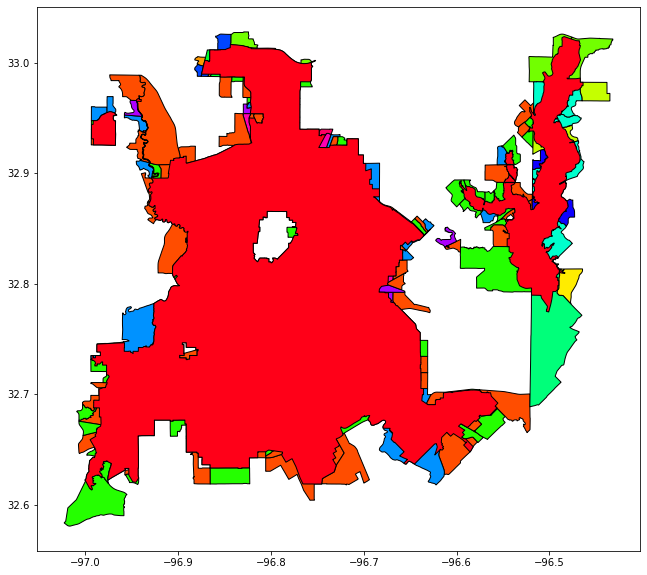

In [48]:
dallas_boundary.plot(cmap='hsv', edgecolor='black', figsize=(20,10), column='name')

In [72]:
type(dallas_boundary.geometry[0])

shapely.geometry.multipolygon.MultiPolygon

AttributeError: 'numpy.ndarray' object has no attribute 'set_aspect'

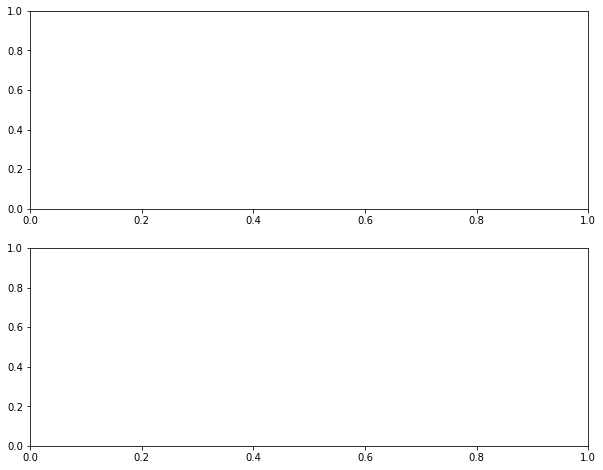

In [60]:
fig, ax = plt.subplots(nrows=2, figsize=(10,8))
dallas_streets.plot(ax=ax, color='grey')
dallas_gdf.plot(ax=ax, markersize=1.5)